# El método del codo y el factor de la silueta del clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

from scipy.spatial.distance import cdist

In [2]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

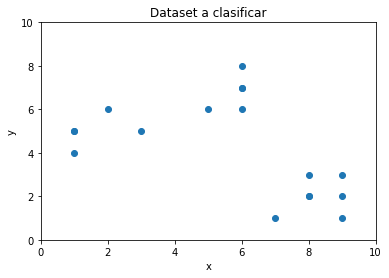

In [3]:
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1, x2)
plt.show()

In [13]:
max_k = 10 # Máximo número de clusters que vamos a crear
K = range(1, max_k)
ssw = []
color_palette = [plt.cm.Spectral(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis=1))

for k in K:
    print(k)
    kmean_model = KMeans(c_clusters=k).fit(X)
    centers = pd.DataFrame(kmean_model.cluster_centers_)
    labels = kmean_model.labels_
    
    ssw_k = sum(np.min(cdist(X, kmean_model.cluster_centers_, "euclidean"), axis=1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    # Fabricaremos una silueta para cada cluster
    # Por seguridad, no hacemos silueta si k = 1 o = len(X)
    if 1 < k < len(X):
        # Crear un subplot de una fila y dos columnas
        fig, (axis1, axis2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 8)
        
        # El primer subplot contendrá la silueta, que puede tener valores desde -1 a 1
        # En nuestro caso ya controlamos que los valores están entre -0.1 y 1
        axis1.set_xlim([-0.1, 1.0])
        
        # El número de clusters a insertar determinará el tamaño de cada barra
        # El coeficiente (n_clusters+1)*10 será el espacio en blanco que dejaremos entre siluetas individuales
        # de cada cluster para separarlas
        axis1.set_ylim([0, len(X)+(k+1)*10])
        
        silhouette_avg = silhouette_score(X, labels)
        print("* Para k = {} el promedio de la silueta es: {}".format(k, silhouette_avg))
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            # Agregamos la silueta del cluster k
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - Para i = {} la silueta del cluster vale: {}".format(i+1, np.mean(ith_cluster_sv)))
            # Ordenamos descendientemente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
            
            # Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_clustersv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            # Elegimos el color del cluster
            color = color_palette[i]
            
            # Pintamos la silueta del clustes i-ésimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sv, facecolor=color, alpha=0.7)
            
            # Etiquetamos dicho cluster con el número en el centro
            axis1.text(-0.05, y_lower+0.5*ith_cluster_size, str(i+1))
            
            # Calculamos el nuevo y_lower para el siguiente cluster del gráfico
            y_lower = y_upper + 10 # dejamos vacías 10 posiciones sin muestra
        
        axis1.set_title("Representación de la silueta para k = {}".format(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del cluster")
        
        # Fin dela representación de la silueta
    
    # Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.title("Clustering para k = {}".format(k))
    plt.scatter(x1, x2, c=label_color)
    plt.scatter(centers[0], centers[1], c=color_palette, marker="x")
    plt.show()

1


TypeError: __init__() got an unexpected keyword argument 'c_clusters'

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

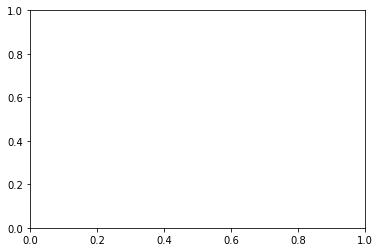

In [17]:
# Representación del codo
plt.plot(K, ssw, "bx-")
plt.xlabel("k")
plt.ylabel("SSW(k)")
plt.title("La técnica del codo para encontrar el k óptimo")
plt.show()